In [21]:
#!/usr/bin/env python3
## import libraries
import numpy as np
import pandas as pd
from keras.models import load_model
from keras.preprocessing import sequence
import matplotlib.pyplot as plt
import tensorflow as tf

In [22]:
# set GPU memory
gpu_options = tf.GPUOptions(allow_growth=True)
sess = tf.Session(config=tf.ConfigProto(gpu_options=gpu_options))

In [23]:
model = load_model('./saved model/500_data/prediction_not_fixed_top5')

In [24]:
dataset = pd.read_csv("./datasets/split by random for distributed/prediction/top5_test.csv", header=None)
dataset = dataset.fillna(0)
dataset

,0,1,2,3,4,5,6,7,8,9,...,128,129,130,131,132,133,134,135,136,137
0,98.2815,302.499,43.4676,96.9341,292.527,45.9779,95.5062,280.345,48.7612,94.1041,...,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
1,49.2123,286.334,42.7695,48.9613,276.363,44.8216,48.7738,265.579,46.4913,48.9726,...,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
2,112.8700,299.723,43.2408,111.9300,288.898,44.8629,110.7920,278.619,46.1567,109.9550,...,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
3,118.7660,289.277,42.6587,117.3220,277.631,44.9817,115.8250,267.763,47.0061,114.5390,...,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
4,77.3434,323.038,43.3315,77.5085,313.501,45.7540,77.6320,301.557,47.9476,77.7495,...,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,68.9601,284.768,40.7917,69.0397,271.469,42.6744,68.5909,263.878,43.1709,68.6592,...,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
246,68.9769,301.014,44.6484,69.0480,290.905,46.6590,68.8589,281.277,48.0806,68.9315,...,33.7456,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
247,94.6610,316.460,44.9202,93.8949,305.949,47.1931,93.1668,295.935,49.1059,92.4186,...,32.4635,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
248,36.8026,303.074,43.7032,36.2891,292.288,45.0557,36.1343,280.696,46.0372,35.6420,...,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0


In [25]:
dataset = np.array(dataset)
dataset.shape

(250, 138)

In [26]:
np.set_printoptions(suppress=True)
dataset[10,:]

array([106.052  , 320.028  ,  44.0532 , 105.117  , 310.824  ,  46.6853 ,
       104.488  , 297.982  ,  48.7293 , 103.822  , 288.453  ,  50.3033 ,
       102.939  , 279.357  ,  51.5626 , 102.175  , 268.18   ,  52.8666 ,
       101.302  , 258.78   ,  53.4653 , 100.558  , 247.563  ,  53.8895 ,
        99.9284 , 237.972  ,  53.9101 ,  99.0432 , 227.798  ,  53.6383 ,
        98.2073 , 218.101  ,  52.9439 ,  97.4115 , 208.824  ,  52.0678 ,
        96.5177 , 200.882  ,  50.236  ,  95.7442 , 191.442  ,  48.7848 ,
        94.9081 , 183.376  ,  44.7917 ,  94.2708 , 172.972  ,  44.6453 ,
        93.0796 , 161.739  ,  40.3566 ,  92.6535 , 157.373  ,  38.8245 ,
        91.9706 , 148.198  ,  35.8351 ,  91.0432 , 140.692  ,  31.9009 ,
        90.1451 , 133.388  ,  27.9258 ,  89.5225 , 124.44   ,  24.0959 ,
        88.8238 , 116.993  ,  19.7076 ,  88.1165 , 109.156  ,  15.1542 ,
        87.2969 , 102.065  ,  10.2387 ,  86.3076 ,  94.5509 ,   5.21261,
        85.6654 ,  87.3448 ,   1.2116 ,  85.024  , 

In [27]:
traj = np.array([0,0,0])
error = np.array([0])
err = []
cnt = 0
flag = False
for i in range(0,250):
    tmp = dataset[i,:]
    #print(tmp.shape)
    tmp = tmp.reshape(1,tmp.shape[0])
    tmp = sequence.pad_sequences(tmp, maxlen=tmp.shape[1]+27, padding='post', dtype='float32')
    #print(tmp.reshape(int(tmp.shape[1]/3),3))
    tmp = tmp.reshape(tmp.shape[1],)
    #print(tmp.shape)
    for j in range(0, tmp.shape[0], 3):
        if tmp[j] != 0 and tmp[j+1] != 0 and tmp[j+2] != 0:
            a = tmp[j:j+3]
            #print(a)
            #print("update times ", cnt)
            if traj[0] == 0 and traj[1] == 0 and traj[2] == 0:
                traj = a
            else:
                if traj.shape[0] < 27:
                    traj = np.hstack((traj,a))
                    #print(traj.shape)
                else:
                    print("update times ", cnt)
                    if flag == False:
                        #print(traj.reshape(9,3))
                        pred = model.predict(traj.reshape(1,9,3))
                        #print("pred = \n", pred)
                        actu = tmp[j:j+27]
                        #print(actu.reshape(1,9,3))
                        flag = True
                        print('error = \n', actu.reshape(1,9,3)-pred)
                        #error = np.sum((actu.reshape(1,9,3)-pred)/27)
                        err.append(np.sum((actu.reshape(1,9,3)-pred)/27))
                    else:
                        traj[:-3,] = traj[3:]
                        traj[24:] = a
                        #print(traj.reshape(9,3))
                        pred = model.predict(traj.reshape(1,9,3))
                        #print("pred = \n", pred)
                        actu = tmp[j+3:j+3+27]
                        #print(actu.reshape(1,9,3))
                        print('error = \n', actu.reshape(1,9,3)-pred)
                        #error = np.hstack((error, np.sum((actu.reshape(1,9,3)-pred)/27)))
                        err.append(np.sum((actu.reshape(1,9,3)-pred)/27))
                        #print(np.sum(np.abs(actu.reshape(1,9,3)-pred)/27))
                    
                    cnt += 1
    #print(error)
    #print(err)
    traj = np.array([0,0,0])
    cnt = 0
    flag = False
    #error = np.array([0])

update times  0
error = 
 [[[-0.6369171   1.6100311   0.03155899]
  [-0.4449997   0.97421265  0.5108032 ]
  [-0.87155914 -0.10221863  0.41186142]
  [-0.90956116 -0.20939636  0.2594986 ]
  [-0.9986572  -1.0501251   0.32654953]
  [-0.9889679  -1.502594    0.23228455]
  [-1.4369507   0.4849701  -0.304348  ]
  [-1.3197632  -0.34786987 -0.09929276]
  [-1.1805344  -1.7471924  -0.15524292]]]
update times  1
error = 
 [[[-0.85800934 -2.0237885   0.35881424]
  [-1.1376343  -1.7198792   0.5487251 ]
  [-1.1171722  -1.4604645   0.29145813]
  [-1.0696182  -1.199997   -0.14811707]
  [-1.3545914   1.3862457  -0.8652153 ]
  [-1.0561905   1.1842651  -0.728096  ]
  [-0.70347595  0.4986267  -0.77378845]
  [-0.45859528  2.6399384  -1.260231  ]
  [-0.5760498   0.58096313 -1.2941132 ]]]
update times  2
error = 
 [[[-0.78692627  1.6680908   0.33876038]
  [-0.8935089   1.9534149   0.58124924]
  [-1.0387344   2.6308594   0.06589127]
  [-1.6474152   5.5790863  -0.8196678 ]
  [-1.5318375   5.6541595  -0.75465393

error = 
 [[[-0.86990356 -0.44864655  0.5826216 ]
  [-0.17163086 -1.7192078   1.1299391 ]
  [-0.127182   -2.042141    0.9532087 ]
  [-0.02732849 -0.84129333  1.2519135 ]
  [ 0.1357727  -1.2742538   0.70765686]
  [ 0.13278198 -0.837265    0.3601408 ]
  [ 0.19629669 -1.1843014   0.71307564]
  [ 0.12085724 -1.6606979   0.9147644 ]
  [ 0.09840393  2.891901   -1.343893  ]]]
update times  14
error = 
 [[[-0.23303986 -0.96739197  0.5506191 ]
  [ 0.02793884 -1.9415321   0.37671924]
  [ 0.432724   -0.6179123   2.1354718 ]
  [ 0.6972351  -1.089428    1.2482872 ]
  [ 0.56108856 -0.57388306  0.84318066]
  [ 0.68279266 -0.7813053   1.0363293 ]
  [ 0.6298599  -1.0033855   0.99417496]
  [ 0.5983658   3.9845352  -1.5845661 ]
  [ 0.07097626 -1.7253246   0.9834976 ]]]
update times  15
error = 
 [[[-0.02019501 -1.282589   -0.01974797]
  [ 0.6166992  -0.6113739   1.520679  ]
  [ 0.90963745 -0.9704399   1.6673985 ]
  [ 0.6432953  -0.5048065   1.1152868 ]
  [ 0.6918106  -0.7062359   1.2622051 ]
  [ 0.703788

error = 
 [[[-0.3429985   0.43379784 -0.74949265]
  [-0.6540985   0.5586591  -1.25593   ]
  [-0.8781738   0.7524471  -1.1313496 ]
  [-0.95532227  1.5975113  -1.0588169 ]
  [-0.9815941   2.2044735  -1.1858463 ]
  [ 0.08745575  1.8919411  -0.10678673]
  [-1.1835022  -0.963295   -0.26798248]
  [ 0.5814285   0.30622482  0.41428947]
  [ 0.4443779   0.2621727   0.24620056]]]
update times  25
error = 
 [[[ 0.14975357  1.0191884  -0.37585258]
  [-0.5319176   1.0993023  -0.8124943 ]
  [-0.41137314  1.0310326  -0.4948578 ]
  [-0.14277267  1.5494137  -0.50990677]
  [-0.14870453  1.1734886  -0.85259056]
  [-3.856224    0.4914093  -1.7410431 ]
  [-0.3089409   1.4781609   0.1076622 ]
  [ 0.57048416  0.06932449  0.21044922]
  [ 0.7592163  -0.43533707  0.25437927]]]
update times  26
error = 
 [[[-0.380188    0.41880608  0.29898262]
  [-1.2481308   0.58602905 -0.10536003]
  [-0.7175827   0.34036064 -0.25205612]
  [ 0.19276428  0.46025467 -0.3961811 ]
  [-1.2277565  -0.8768158  -0.38032722]
  [-0.604793

update times  13
error = 
 [[[-0.20653152  0.5130234  -0.4675951 ]
  [-0.23732376  0.21014404 -0.3508606 ]
  [ 0.10095978 -0.0316391  -0.34404802]
  [ 0.3542061  -0.95586395  0.21888685]
  [ 0.6104088  -0.8089981   0.61648464]
  [ 0.95420074 -1.7985992   1.300847  ]
  [ 0.86611176 -1.6569595   1.303237  ]
  [ 1.061966   -2.339569    1.84828   ]
  [ 0.9490509  -2.7032166   2.2345448 ]]]
update times  14
error = 
 [[[ 0.00490952  0.95526123 -0.5494518 ]
  [ 0.08027649  0.28055573 -0.4054408 ]
  [ 0.47558975 -0.4169464  -0.06906843]
  [ 0.7285309  -0.34889984  0.8387232 ]
  [ 1.203682   -1.3508148   1.3218307 ]
  [ 1.244854   -1.2356567   1.404851  ]
  [ 1.5427055  -1.860569    1.9212818 ]
  [ 1.502449   -1.910675    2.187212  ]
  [ 1.5222855  -2.3228035   2.4057388 ]]]
update times  15
error = 
 [[[-0.3459549   0.4567032  -0.67461824]
  [ 0.4202881  -0.805809    0.21819448]
  [ 0.62717056 -0.748085    0.5381594 ]
  [ 1.0360413  -1.9413147   1.2579384 ]
  [ 1.1542587  -2.013279    1.53358

error = 
 [[[ 0.5921936  -1.0885696  -0.36235523]
  [ 0.75206757 -0.76750946 -0.5157175 ]
  [ 1.0656967  -1.3866081  -0.6717911 ]
  [ 1.3654938  -0.92204285 -1.2794533 ]
  [ 1.7315216  -1.1960983  -1.5137806 ]
  [ 2.0538635  -1.0217781  -2.045969  ]
  [ 2.31221    -0.76981926 -2.8135662 ]
  [ 2.5954056  -1.2456379  -3.252182  ]
  [ 2.8164215  -1.3452675  -3.8368053 ]]]
update times  17
error = 
 [[[ 0.74575806  0.39214706 -0.4387474 ]
  [ 0.7289734  -0.03045273 -0.24333954]
  [ 0.93310547  0.58216476 -0.443161  ]
  [ 1.1153717   0.4391365  -0.33776855]
  [ 1.3051987   0.7314644  -0.48270607]
  [ 1.4797134   1.1257782  -0.8280544 ]
  [ 1.6992264   0.8446388  -0.8085041 ]
  [ 1.8591995   1.0301864  -0.9091377 ]
  [ 1.9452286   1.062932   -1.0186844 ]]]
update times  18
error = 
 [[[ 0.9119873   0.01324081  0.14831257]
  [ 0.9401398   0.25932312  0.05232048]
  [ 1.1235886  -0.00551605  0.26110458]
  [ 1.2423782   0.12413788  0.18093872]
  [ 1.3521347   0.39839554 -0.07852554]
  [ 1.549781

update times  13
error = 
 [[[-0.24597168  0.07388306 -0.30418396]
  [-0.23969269 -0.6939697  -0.44077897]
  [ 0.03835297 -1.2245102   0.34415507]
  [ 0.02051544 -1.7125473   0.40243912]
  [ 0.3210907  -1.7464027   0.35490036]
  [ 0.44052887 -2.0022545   0.52765656]
  [ 0.5150528  -2.0707283   0.42391777]
  [ 0.55020905 -2.164215    0.337965  ]
  [ 0.5277786  -2.8223476   0.12443161]]]
update times  14
error = 
 [[[-0.0437088   0.04455566  0.1348207 ]
  [ 0.45319366 -0.7477188   1.1156986 ]
  [ 0.5474472  -0.84210205  0.9073887 ]
  [ 0.71274567 -0.7133255   0.8669052 ]
  [ 0.8187027  -0.7960663   0.9415283 ]
  [ 0.93258667 -0.76740646  0.76626396]
  [ 1.0133057  -0.663929    0.66659737]
  [ 1.0696259  -0.92077637  0.4403305 ]
  [ 1.003273   -1.3295231   0.33667374]]]
update times  15
error = 
 [[[ 0.23389435 -0.2791977   0.9805839 ]
  [ 0.40512085 -0.9516525   1.1980791 ]
  [ 0.583786   -0.6706619   0.9389076 ]
  [ 0.7270813  -0.49705124  0.96332645]
  [ 0.83636475 -0.49803543  0.89955

error = 
 [[[ 0.39001465  0.53824615  1.422075  ]
  [ 0.5841675   0.06180573  0.97708416]
  [ 0.5856705   0.42836     0.5956278 ]
  [ 0.9177704  -0.39003754  0.90606976]
  [ 1.1025772  -0.8823395   0.7156601 ]
  [ 1.0964966  -0.48236465  0.47066116]
  [ 1.2272949  -0.7474289   0.45816422]
  [ 1.2501297  -0.9831314   0.2528553 ]
  [ 1.4238968  -1.1869831   0.16118431]]]
update times  13
error = 
 [[[ 0.23014832  0.21639252 -0.04813194]
  [ 0.3162384   0.06526947  0.30375195]
  [ 0.46092987 -0.67150116  0.6079979 ]
  [ 0.7327652  -0.9482727   0.415699  ]
  [ 0.7462921  -0.5447273   0.14880371]
  [ 0.8742142  -0.84910965  0.18010712]
  [ 0.85974884 -1.1035233   0.02672768]
  [ 0.9592743  -1.2170677  -0.07435226]
  [ 0.80013275 -1.3605099  -0.04787064]]]
update times  14
error = 
 [[[ 0.7188034   0.7802429   0.27029037]
  [ 0.82035065 -0.45846558  0.85030746]
  [ 1.0375137  -0.8172989   1.0576324 ]
  [ 0.9865265  -0.399189    0.96652603]
  [ 1.1071854  -0.74274826  1.1035614 ]
  [ 1.129875

  [ 0.5652847   1.6445827   0.34568405]]]
update times  19
error = 
 [[[ 0.84319305 -0.04528427  0.07557106]
  [ 0.7763748   0.8124771  -0.2649498 ]
  [ 0.77471924  0.28380966  0.11322212]
  [ 0.49547577  1.1980438   0.05189896]
  [ 0.41754913  1.4542837  -0.14821243]
  [ 0.45336914  1.5149932   0.12199402]
  [ 0.45278168  1.8005153   0.05382919]
  [ 0.41391754  1.7797832   0.04158783]
  [ 0.45135498  1.5078077   0.09740829]]]
update times  20
error = 
 [[[ 0.7187271   0.7081604  -0.1739502 ]
  [ 0.62784576  0.17646217 -0.09092903]
  [ 0.28102112  1.1850224  -0.25897408]
  [ 0.11315155  1.5053511  -0.50941086]
  [ 0.07421112  1.6870036  -0.26968002]
  [ 0.06851196  2.153081   -0.34334946]
  [ 0.06269073  2.3592663  -0.3500328 ]
  [ 0.14361572  2.3660192  -0.29131317]
  [ 0.19415283  2.9259033  -0.631176  ]]]
update times  21
error = 
 [[[ 1.1384354  -0.30332375  0.39366913]
  [ 0.42388916  0.70770264 -0.05582619]
  [ 0.28836823  1.0231695  -0.24715042]
  [ 0.09170532  0.9904704   0.040

error = 
 [[[-0.69919586  0.14624023  0.3266716 ]
  [-0.9438858  -0.6500397   0.7198906 ]
  [-1.3055496   0.51849365  0.6353607 ]
  [-1.4230957   0.6737671   0.14564896]
  [-1.6802979   0.32341003  0.08066177]
  [-1.6978912   0.53110504 -0.19000244]
  [-1.9261551   0.9421234  -0.20974731]
  [-2.2013245   1.5331802  -0.34626007]
  [-2.5633469   2.183487   -0.4517727 ]]]
update times  2
error = 
 [[[ 0.6275101   0.2544098   0.42716217]
  [-0.71255493 -1.4747162   0.02351761]
  [-0.9344406   0.5709076  -0.2573166 ]
  [-1.3883362   0.87242126 -0.5211754 ]
  [-1.4818497   1.0635757  -0.8097    ]
  [-1.75074     1.6236267  -0.75250626]
  [-2.0426178   2.3031387  -0.83480835]
  [-2.4019852   3.049263   -0.90260506]
  [-2.7630005   2.754486   -1.159338  ]]]
update times  3
error = 
 [[[-0.5824051   0.91908264  0.00896835]
  [-1.1496887  -0.40525818 -0.26249695]
  [-1.6347656   0.7425232  -0.23265457]
  [-1.6359024   0.883934   -0.55661774]
  [-1.7469559   1.1325989  -0.46367264]
  [-1.8812103 

update times  31
error = 
 [[[ 0.1385994   0.47352982 -0.0099678 ]
  [-0.20045853  0.569149   -0.12648392]
  [-0.15698624  0.5642967  -0.08202744]
  [-0.11717606  0.6201134  -0.10225487]
  [-0.08833694  0.6350975  -0.10513496]
  [-0.08050156  0.6293907  -0.1087532 ]
  [-0.07781601  0.622036   -0.11122894]
  [-0.07728958  0.6158333  -0.11271858]
  [-0.07774734  0.6113663  -0.11346436]]]
update times  0
error = 
 [[[-0.62581253  3.461914   -0.8373947 ]
  [-2.1361732   2.954544   -0.35361862]
  [-2.186657    2.6671295  -0.6824951 ]
  [-2.7855644   3.3528595  -0.7458801 ]
  [-3.0929108   3.7834778  -0.8303604 ]
  [-2.9239922   2.5425262  -0.7953987 ]
  [-3.3154259   4.2416077  -1.3465576 ]
  [-2.9383507   2.5241547  -1.1290245 ]
  [-2.8162842   1.867569   -1.6230583 ]]]
update times  1
error = 
 [[[ 0.76527023  0.5788574   0.11952591]
  [-0.6171074   0.9025879  -0.5677719 ]
  [-0.6316414   2.539215   -0.8676834 ]
  [-0.4492073   1.6289215  -1.2378349 ]
  [-0.7028847   3.639557   -2.0133057

error = 
 [[[-0.6361313   1.8993378  -0.17028427]
  [-0.87125397  3.0833893  -0.14568329]
  [-0.60269165  3.109604   -0.15413857]
  [-0.55126953  3.2173462   0.08250237]
  [-0.6073303   4.8349915  -0.33670235]
  [-0.51956177  5.347946   -0.13455963]
  [-0.47066498  5.4626846   0.15679455]
  [-0.3525238   5.615387    0.48617458]
  [-0.3228073   6.738739    0.38394594]]]
update times  5
error = 
 [[[-0.8198395   1.8782806  -0.14692688]
  [-0.8987427   1.7948303  -0.1318512 ]
  [-0.65086365  2.1641998   0.10903358]
  [-0.79587555  3.8649597  -0.30864716]
  [-0.71362305  4.4509583  -0.07115555]
  [-0.6651459   4.64167     0.22564411]
  [-0.56507874  4.9536133   0.49085236]
  [-0.5724716   6.335388    0.33671236]
  [-0.36003876  6.557953   -1.1025369 ]]]
update times  6
error = 
 [[[-0.5458374   0.7404022  -0.18896866]
  [-0.57528687  0.6916504   0.02394676]
  [-0.4746933   2.4886017  -0.4683113 ]
  [-0.41399384  3.0203705  -0.2686081 ]
  [-0.32629395  3.1736526   0.00382137]
  [-0.18611908

error = 
 [[[-0.96958923  0.08621216  0.01152802]
  [-1.0229492   1.3034058   0.03609467]
  [-1.0342789  -0.24453735  0.09016037]
  [-1.0070038  -0.44352722  0.30462646]
  [-1.1160736  -1.5926361   0.4140587 ]
  [-1.155014   -2.5203705   0.5068283 ]
  [-1.2689438  -2.3974762   0.22375488]
  [-1.2912521  -3.3447266  -0.10992432]
  [-1.524086   -3.9996643  -0.04050827]]]
update times  1
error = 
 [[[-0.4284134  -2.3915405  -0.07322693]
  [-1.107605   -2.7353058   0.06801605]
  [-0.9848633  -2.7351532   0.253582  ]
  [-1.0857697  -3.0230103   0.1687355 ]
  [-1.2093735  -2.7106934  -0.27614594]
  [-1.1744003  -3.3759308  -0.7244797 ]
  [-1.3440094  -3.6799927  -0.75614357]
  [-1.397522   -4.2302017  -0.9376755 ]
  [-1.6308441  -3.8904724  -1.0645275 ]]]
update times  2
error = 
 [[[-0.9892731   0.68585205  0.47660065]
  [-1.969574   -0.4195404   0.8773155 ]
  [-1.7398758   0.27644348  0.94524765]
  [-2.0892181   0.8253479   0.4309578 ]
  [-2.1032639   0.43040466 -0.04423523]
  [-2.2880554 

error = 
 [[[ 0.00783348  2.4474945   0.68436813]
  [-1.3122368   3.8914642   0.29172897]
  [-0.15459251  3.1049042   0.75032806]
  [ 0.29252815  2.0493011   1.0277958 ]
  [ 0.29480934  3.9955444   0.7786522 ]
  [ 0.5855694   3.8649902   1.1743126 ]
  [ 0.8216858   4.042137    1.3918571 ]
  [ 1.28858     3.8585968   1.2737083 ]
  [ 1.3255348   5.4208374   1.0015001 ]]]
update times  5
error = 
 [[[-1.1446514   3.2165375   0.04368591]
  [-0.79895973  2.025467    0.53510284]
  [-0.10766029  1.2115479   0.9071789 ]
  [-0.28968048  3.3276825   0.6471405 ]
  [-0.06399536  3.0843964   1.0163879 ]
  [ 0.11356735  3.1420364   1.2175312 ]
  [ 0.48282814  2.90979     1.0783882 ]
  [ 0.34902     4.599472    0.8034458 ]
  [ 0.8448696   4.2525253   1.0690908 ]]]
update times  6
error = 
 [[[ 0.6602936   0.95402527  0.3062973 ]
  [ 0.8616295  -0.4962616   0.614624  ]
  [ 1.0816154   1.7859802   0.43769836]
  [ 1.311636    1.6540527   0.8196411 ]
  [ 1.6119499   1.5018082   0.98792267]
  [ 2.115652  

error = 
 [[[ 0.3627243   1.0487657  -0.07945633]
  [-0.5408249   1.5210316  -0.6321621 ]
  [-0.9130554   2.4546967  -0.43507385]
  [-0.04325104  2.8139515  -0.07754707]
  [ 0.32897186  2.6155052   0.12757301]
  [-0.3636093   2.5959015   0.03800201]
  [-1.5096207   0.93847275 -0.0884304 ]
  [-0.8913536   0.55921555 -0.44397163]
  [-0.78832626  1.0041771   0.25920486]]]
update times  25
error = 
 [[[-0.24409485  1.1288579  -0.37206078]
  [-0.8044281   1.0582008  -0.7339325 ]
  [-0.22642517  1.5006313  -0.44029236]
  [ 0.18099213  1.7045326   0.10047531]
  [ 0.17370605  1.2797089  -0.15861702]
  [-3.679245   -0.80904007 -0.526144  ]
  [-0.8877373   1.8399239  -0.6512413 ]
  [ 0.15880966  0.7623024  -0.1452198 ]
  [ 0.11403275  0.15339279 -0.06441879]]]
update times  26
error = 
 [[[-0.19080353  1.2154274  -0.38551712]
  [-0.63899994  1.606287   -0.20087624]
  [ 0.09883118  1.3059883   0.25723457]
  [ 0.42027283  0.8717346   0.3601513 ]
  [-3.1484528  -0.845417    0.25395775]
  [-0.427021

error = 
 [[[ 0.07775879  0.44721222  0.33940208]
  [ 0.1162796  -0.85401154  1.6442437 ]
  [ 0.04508972 -0.45000458  1.2719593 ]
  [ 0.06456757 -0.8132324   1.5652056 ]
  [ 0.1535263  -1.7469254   1.9800367 ]
  [ 0.10404968 -1.7614517   2.0558014 ]
  [ 0.09441376 -2.1874733   2.223997  ]
  [-0.04671478 -2.234661    2.167822  ]
  [-0.02329254 -2.7704964   1.9938774 ]]]
update times  10
error = 
 [[[-0.10401917 -0.5444946   2.9291387 ]
  [-0.17901611 -0.32965088  2.1158571 ]
  [-0.21471405 -0.46862793  1.5022268 ]
  [-0.05014801 -1.4086533   1.9932823 ]
  [-0.10389709 -1.5969467   1.9100285 ]
  [-0.08252716 -2.1371841   2.054802  ]
  [-0.170784   -2.2379646   2.0332527 ]
  [-0.07958221 -2.6866112   1.8856678 ]
  [-0.06594849 -3.5907803   1.9852371 ]]]
update times  11
error = 
 [[[ 0.09409332  0.4017868   0.42222118]
  [ 0.09303284 -0.25852966  0.35217285]
  [ 0.20874786 -0.8970108   0.8451719 ]
  [ 0.3062439  -0.6887436   0.63383865]
  [ 0.43266296 -1.128582    0.7140846 ]
  [ 0.437240

error = 
 [[[0.5001526  0.47610474 0.52329254]
  [0.53787994 0.41360474 0.77456474]
  [0.54354095 0.611557   0.951149  ]
  [0.56082153 0.27952385 1.2404861 ]
  [0.7204056  0.49931145 1.4628277 ]
  [0.8188629  0.5791302  1.6633148 ]
  [0.9269333  0.5806308  1.826355  ]
  [0.89606476 0.49522018 1.9753056 ]
  [0.8754196  0.7914381  1.8847885 ]]]
update times  17
error = 
 [[[0.84293365 0.2589798  0.33057022]
  [0.9628067  0.74048996 0.29094315]
  [0.8582611  0.6793308  0.35080528]
  [0.9569931  1.0752163  0.46559715]
  [1.0315781  1.324789   0.62828445]
  [1.1670532  1.5083079  0.80007935]
  [1.1784286  1.6160774  0.9771671 ]
  [1.1991272  2.1186476  0.9152107 ]
  [1.2011795  1.867672   0.99220467]]]
update times  18
error = 
 [[[ 0.7799301   0.43415833  0.15068054]
  [ 0.7989502   0.2542286   0.10113525]
  [ 0.6319809   0.8078327  -0.0854702 ]
  [ 0.62415314  1.0830288  -0.19322205]
  [ 0.7417908   1.2845798  -0.24429512]
  [ 0.8562851   1.4544067  -0.2289238 ]
  [ 1.0477219   2.0735884 

  [ 0.383152    0.59552383 -0.03765488]]]
update times  0
error = 
 [[[-0.13438416  2.485443   -1.0000381 ]
  [ 1.4019928   3.7046967  -0.18357849]
  [-0.11359406  4.8941956  -0.6660042 ]
  [-0.3995514   3.2723083  -0.2815857 ]
  [-1.0598068  -3.1182556   1.2421799 ]
  [-0.39447784  3.2391205  -0.12781525]
  [-0.09333801  2.6520386  -0.23465538]
  [ 0.18972778  3.7001953  -0.5423527 ]
  [ 0.5154877   3.3848267  -0.4767189 ]]]
update times  1
error = 
 [[[-0.45519257  1.5017395  -1.6765556 ]
  [-0.8423767  -0.37667847 -1.1614609 ]
  [-1.6671066  -5.68869     0.14461517]
  [-1.3183441   1.0197144  -1.215601  ]
  [-1.381546    0.46899414 -1.3815632 ]
  [-1.4302444   1.3655243  -1.7266903 ]
  [-1.3995972   0.9590759  -1.739872  ]
  [-1.5629959   0.7323761  -1.785594  ]
  [-1.7283554   0.6181488  -1.9885206 ]]]
update times  2
error = 
 [[[-1.0916443   0.6369934  -0.36140442]
  [-3.038536   -7.0037994   1.1533813 ]
  [-2.221901    1.3464813  -0.4672699 ]
  [-2.3350983   1.3236237  -0.542676

error = 
 [[[ 0.86881256  1.3748856   0.20944595]
  [ 1.4038162   0.49336243  0.600193  ]
  [ 1.9480362  -0.7840462   1.0664673 ]
  [ 1.4756279  -0.84638596  1.0587578 ]
  [ 0.8877106  -0.567379    0.79886055]
  [ 0.626461   -0.25279617  0.60116196]
  [ 0.5560875  -0.23840714  0.5532856 ]
  [ 0.51397324 -0.2166481   0.5079346 ]
  [ 0.39733505 -0.1744957   0.425045  ]]]
update times  27
error = 
 [[[ 0.26700974  1.1495361   0.04550552]
  [ 1.1882896  -0.22015762  0.6655121 ]
  [ 1.0151482  -0.39738083  0.6950493 ]
  [ 0.68873215 -0.30823898  0.40347672]
  [ 0.5031471  -0.17359924  0.2821846 ]
  [ 0.52838516 -0.21546936  0.34560585]
  [ 0.5758095  -0.22651291  0.35853958]
  [ 0.574131   -0.23763657  0.3493843 ]
  [ 0.5594063  -0.25032425  0.3275833 ]]]
update times  28
error = 
 [[[0.60246277 0.62077713 0.05550575]
  [0.31740952 0.65979385 0.03448105]
  [0.32550812 0.57915497 0.06578636]
  [0.34022903 0.631546   0.03543854]
  [0.35931778 0.651844   0.03380775]
  [0.35811234 0.65065    0.

error = 
 [[[ 69.72835    -47.570873    28.9801    ]
  [  0.38838577   0.57479477   0.08895493]
  [  0.38697815   0.4661026    0.09992981]
  [  0.38552475   0.51449203   0.05886459]
  [  0.39769363   0.53398895   0.05260658]
  [  0.39066696   0.52856827   0.04777145]
  [  0.38183212   0.5211296    0.04451752]
  [  0.37382126   0.514431     0.04219627]
  [  0.36714935   0.50888443   0.04029465]]]
update times  35
error = 
 [[[0.3473549  0.78147125 0.04780197]
  [0.29637527 0.65275955 0.05534363]
  [0.29306412 0.60472107 0.07048416]
  [0.32336044 0.66661835 0.04851913]
  [0.34592438 0.68489456 0.04226875]
  [0.34981537 0.6809883  0.03455734]
  [0.3504753  0.67326355 0.02751541]
  [0.35017776 0.66433334 0.02105331]
  [0.34968948 0.6552162  0.01497459]]]
update times  0
error = 
 [[[-0.8597336   1.5865936  -0.03693008]
  [-0.9731064   1.2215881   0.28648758]
  [-0.8985748  -0.6219177   0.535656  ]
  [-0.7405472   5.039566    1.0398979 ]
  [-0.9512787   0.03225708 -0.04293823]
  [-0.9365845

error = 
 [[[ 1.8400497   1.7785988   0.5848541 ]
  [ 0.6518936   1.9284039  -0.15973473]
  [ 0.33953094  2.3236094  -0.36455917]
  [-0.07804871  2.3823047  -0.5524025 ]
  [-0.46646118  2.3061538  -0.13269424]
  [-0.7298126   3.0958347  -0.23938179]
  [-0.9463806   3.0327797   0.18540192]
  [-1.0422058   3.0505962   0.41811752]
  [-1.0843887   3.189911    0.62340546]]]
update times  23
error = 
 [[[ 0.474617    1.3081455   0.27044106]
  [-0.3001175   0.819726   -0.1740551 ]
  [-1.3182983   1.1801828  -0.32143402]
  [-1.6718063   1.1249175  -0.07924652]
  [-1.7695007   2.3057346  -0.39152908]
  [-2.000946    2.5327415  -0.08269501]
  [-2.2049255   2.522398    0.13558197]
  [-2.1776276   2.8116913   0.25896454]
  [-1.5332947   2.240326    0.02281952]]]
update times  24
error = 
 [[[ -0.8103409    1.895524    -0.13930702]
  [ -0.37187195   2.8276782    0.61164665]
  [  0.65184784   3.116651     0.90068054]
  [  0.07995605   3.2293568    0.6852379 ]
  [  0.30639648   3.4391975    1.3802757

  [-0.0912323   5.685585   -0.8147764 ]]]
update times  6
error = 
 [[[-0.14672852  1.019577   -0.9352722 ]
  [ 0.04027557  1.4076843  -0.67103386]
  [ 0.14742279  1.8801041  -0.11582756]
  [ 0.18286896  3.0032043  -0.2324524 ]
  [ 0.43430328  2.6147766   0.13895607]
  [ 0.3260727   2.36335     0.33228588]
  [ 0.34189606  3.1362915  -0.07659149]
  [ 0.5445404   3.8175812  -0.24564743]
  [ 0.51161194  3.9074593   1.3376639 ]]]
update times  7
error = 
 [[[-0.33211517  1.3880157  -0.8700123 ]
  [-0.04628754  0.9703598  -0.39953613]
  [-0.02872467  2.3264465  -0.44795227]
  [ 0.16613007  1.878418    0.0787487 ]
  [ 0.03873444  1.5166245   0.4066    ]
  [ 0.0654068   2.1831207   0.10894394]
  [ 0.25619507  2.812233    0.12235451]
  [ 0.19639587  2.9557877   1.8560097 ]
  [-0.1643219   2.3194046   3.1370182 ]]]
update times  8
error = 
 [[[-0.61133575  0.39154816 -0.13654518]
  [-0.46300507  1.0880737  -0.2993164 ]
  [-0.15381622  0.8742218   0.32409096]
  [-0.3033371   0.4142151   0.854080

error = 
 [[[0.29736328 0.78974533 0.04832458]
  [0.2693367  0.6699257  0.08334351]
  [0.25681686 0.60873795 0.09468079]
  [0.2917061  0.6711807  0.07643127]
  [0.31669998 0.689621   0.07177925]
  [0.3215294  0.68491364 0.0646286 ]
  [0.32263184 0.6761284  0.05775261]
  [0.3225479  0.6660652  0.05126381]
  [0.3221779  0.6558876  0.04508591]]]
update times  0
error = 
 [[[-0.58461    -0.6655121  -0.10400772]
  [-0.51625824  1.3771057  -0.2909813 ]
  [-0.33916473 -0.19451904 -0.16257858]
  [-0.32078552  1.0316772  -0.25214386]
  [-0.2594986   0.5588379  -0.26931763]
  [-0.25256348  1.9724274  -0.8632355 ]
  [-0.38487244  1.2342072  -1.1746635 ]
  [-0.40805817  0.02891541 -0.55674744]
  [-0.7469559   0.4524994  -1.1122398 ]]]
update times  1
error = 
 [[[-0.9575119  -3.163742   -0.57373047]
  [-1.2633209  -1.1576538  -0.71251297]
  [-0.9382858  -0.8030243  -0.72314835]
  [-0.8338165   1.3258972  -1.3663788 ]
  [-0.9063568   0.80963135 -1.7621727 ]
  [-0.80675507 -0.12763977 -1.1993904 ]
 

error = 
 [[[-0.7084656   2.0950623  -0.14620209]
  [-0.949173    0.61602783  0.28086853]
  [-1.0771713   0.6628113   0.09860992]
  [-1.2637482   0.8052368  -0.30016708]
  [-1.282547    0.98287964 -0.63313675]
  [-1.2240372   0.5949707  -0.7039871 ]
  [-1.3429337   0.44155884 -0.731781  ]
  [-1.6396866   0.43521118 -0.5409317 ]
  [-1.5501823  -0.10273743 -0.9832897 ]]]
update times  1
error = 
 [[[-0.11262512 -1.3420258  -0.3080635 ]
  [-1.1580963  -0.76779175 -0.53391266]
  [-0.8092346   0.6933136  -0.9081688 ]
  [-0.5723419   1.0543671  -1.1286621 ]
  [-0.5031967   1.4109802  -1.2495804 ]
  [-0.5654907   1.9351807  -1.0832596 ]
  [-0.2151146   2.0387268  -1.4850292 ]
  [-0.05295563  2.9637604  -1.8222027 ]
  [ 0.17648697  2.4869843  -1.7222309 ]]]
update times  2
error = 
 [[[-1.0475845   1.578064   -0.26898956]
  [-1.3598022   2.6872253  -0.44049454]
  [-1.1146164   3.3744965  -0.5508537 ]
  [-1.1872025   4.0563965  -0.61608124]
  [-1.4248276   4.726761   -0.38905334]
  [-1.217865  

error = 
 [[[-0.7893524   1.2978973  -0.4215393 ]
  [-0.75761414  2.8949585  -0.7311611 ]
  [-0.78582     2.7284698  -0.27216148]
  [-0.6678467   3.3313599  -0.22504997]
  [-0.53497314  3.4040756  -0.27853775]
  [-0.43293762  3.7003632  -0.13431358]
  [-0.27243805  4.6318817  -0.2241087 ]
  [-0.06797791  4.3293686   0.23610973]
  [-0.1637497   5.243828    1.6458182 ]]]
update times  8
error = 
 [[[-0.821373    2.3986816  -0.357399  ]
  [-0.9346161   1.7028656   0.13150597]
  [-0.7367096   2.1173553   0.09744644]
  [-0.6293411   1.9980545   0.07024002]
  [-0.5090866   2.0512238   0.24978447]
  [-0.32548523  2.7324677   0.15546131]
  [-0.17197418  2.1910172   0.5960989 ]
  [-0.28742218  2.9815445   1.4350524 ]
  [ 0.03656769  2.493126    1.609788  ]]]
update times  9
error = 
 [[[-1.1018677   0.07273865  0.15665054]
  [-1.0870819  -0.26965332 -0.05886459]
  [-1.0184555  -0.8541794  -0.24305534]
  [-1.0238342  -1.3141327  -0.11754131]
  [-0.9306183  -1.1664734  -0.30072784]
  [-0.8868561 

error = 
 [[[ 0.62970734  0.8264799   0.3272648 ]
  [ 0.04280853  0.33865356  0.1044445 ]
  [-0.01202393  0.58838177 -0.44870567]
  [-0.77713776  1.3599424  -0.95376587]
  [-0.07341003  1.4905586  -1.116291  ]
  [ 0.6022644   0.8623009  -0.81796646]
  [ 0.9638138   1.4742508  -0.08892059]
  [ 0.43888092 -1.2839165   0.3691597 ]
  [ 1.5611534   2.0419426  -0.8599787 ]]]
update times  23
error = 
 [[[ 1.2145615   0.5486069  -0.1463852 ]
  [ 1.5076752   0.35799694  0.19984245]
  [ 1.383995    0.43036175  0.09115791]
  [ 0.9967575   1.1161995  -0.17328262]
  [ 0.64224243  1.1841164  -0.5641537 ]
  [ 1.5168076   2.2819748  -0.32636833]
  [ 2.0343971  -0.30113602  1.1108742 ]
  [ 0.05176163 -0.35134888 -0.03617859]
  [ 0.9950218  -0.5529213   0.27596092]]]
update times  24
error = 
 [[[ 0.8814087   1.8111563  -0.82255745]
  [ 1.4499741   1.6497755  -0.4785061 ]
  [ 1.051033    1.7088013  -0.6543827 ]
  [ 0.70767975  1.6745262  -0.617857  ]
  [ 1.2092972   2.2118225   0.13090515]
  [-0.202209

update times  28
error = 
 [[[ -0.71528244   0.32282782  -0.88227844]
  [  0.1048317    0.49655437  -1.7317543 ]
  [ -0.45381546  -0.40584755  -1.1238518 ]
  [ -0.81596756  -1.0743103   -1.3810463 ]
  [ -0.01608658   0.33240128  -0.83218384]
  [ -0.42004013  -2.2825127   -1.559288  ]
  [-27.534775    34.968456   -27.217999  ]
  [  0.53995514  -0.25987244  -0.2926159 ]
  [  1.2701035   -1.2812233    0.9674034 ]]]
update times  29
error = 
 [[[ -0.5402641    0.48242474  -1.1093864 ]
  [ -0.33399582   0.6825619   -1.394947  ]
  [ -0.41561127  -0.6203232   -0.73106   ]
  [  0.34266663   2.1761436   -0.91433334]
  [ -0.06691742   0.05332565  -1.3367882 ]
  [-25.71126     35.41409    -26.654896  ]
  [  1.4312973    1.065422     0.31998825]
  [  1.064785    -0.9034233    0.3607254 ]
  [  1.4614525   -1.0670738    0.61278915]]]
update times  30
error = 
 [[[ -0.35477066   0.20396233  -1.1440315 ]
  [ -0.37643433   0.20082092  -0.9631386 ]
  [  0.91988754   0.0058403   -0.22832489]
  [  0.19888

error = 
 [[[-0.3806839   0.07242584 -0.4034443 ]
  [-0.565712   -0.12732697 -0.72597694]
  [-0.1598053  -1.6354218  -0.41678   ]
  [ 0.00642395 -2.1459427   1.722003  ]
  [ 0.19705963 -2.8094177   1.0796747 ]
  [ 0.40023804 -3.4840622   0.8253555 ]
  [ 0.58882904 -4.002323    0.74440765]
  [ 0.7890167  -4.370434    0.49285316]
  [ 0.82530975 -4.626335   -0.01944542]]]
update times  12
error = 
 [[[-0.45732117  1.0435715  -0.4858265 ]
  [-0.0316391  -1.3202362  -0.6307025 ]
  [-0.02000427 -1.8036728   1.9940138 ]
  [ 0.19011688 -2.3253021   0.9596853 ]
  [ 0.3813553  -2.8595276   0.81739235]
  [ 0.60617065 -3.4525566   0.66911316]
  [ 0.7722702  -3.8213654   0.42061996]
  [ 0.778244   -3.9013443  -0.2007103 ]
  [ 0.77754974 -4.4900475  -0.5532398 ]]]
update times  13
error = 
 [[[ 0.59498596 -0.7679138   0.5107541 ]
  [ 0.5495148  -1.6097565   1.8647566 ]
  [ 0.655159   -2.155548    0.49331665]
  [ 0.82579803 -2.6931534   0.6843319 ]
  [ 1.0082245  -3.2916374   0.38733196]
  [ 1.195282

error = 
 [[[  0.86535263   1.1438518   -0.13377953]
  [  0.46063614   1.117219    -0.44818878]
  [  0.31278992   1.402523    -0.44921875]
  [  0.5524292    1.238491    -0.7841606 ]
  [  1.2167702    1.9313507   -0.32139206]
  [  0.41547775   0.58761597  -0.9229088 ]
  [-46.676083    39.90269    -27.401651  ]
  [  1.3192825   -0.20051956   0.46894073]
  [  1.2165489   -0.6806984    0.9650383 ]]]
update times  25
error = 
 [[[  0.66059494   0.91837406  -0.0481987 ]
  [  1.0698128    1.6555748   -0.21720886]
  [  0.9717407    1.0981255   -0.2951851 ]
  [  2.2920113    2.3396225    0.29455566]
  [  2.005188     0.57653046  -0.00886154]
  [-27.742092    26.083649   -17.077648  ]
  [  1.5005836   -0.46741867   0.6865082 ]
  [  0.92274475  -1.2739067    0.60961914]
  [  0.47951126  -0.5173912    0.18393707]]]
update times  26
error = 
 [[[ -0.00976944   0.6679878   -0.22345352]
  [  0.21369171   1.265316    -0.2326622 ]
  [  1.9920158    0.6339874    0.8401184 ]
  [  0.5870514   -0.18726349 

error = 
 [[[-0.44889832 -0.12669373  0.08767605]
  [-0.71836853  0.8982315  -0.73975563]
  [-0.49108887  0.27801514 -0.4214115 ]
  [-0.42788696 -0.6206665   2.0927744 ]
  [-0.10974121 -1.5008926   2.478592  ]
  [-0.13774872 -1.4979324   2.7708416 ]
  [-0.13689423 -1.9274521   3.4009762 ]
  [-0.10121918 -1.7338829   3.6397877 ]
  [-0.07887268 -2.6057777   4.33737   ]]]
update times  12
error = 
 [[[-0.48710632  2.0502853  -0.7975979 ]
  [-0.27719116  0.5569458  -0.79790497]
  [-0.33324432 -0.31340027  2.4290676 ]
  [ 0.01933289 -1.0524216   2.59124   ]
  [ 0.01470947 -0.87122345  2.8972626 ]
  [ 0.06833649 -1.3793488   3.4528294 ]
  [ 0.08390808 -1.1965027   3.7412777 ]
  [ 0.08869171 -1.9211082   4.3668385 ]
  [ 0.05717468 -2.3741875   4.5378036 ]]]
update times  13
error = 
 [[[ 0.18331909  0.4537506  -0.02793884]
  [ 0.16667938 -0.8535309   2.3442383 ]
  [ 0.35832214 -1.7792282   2.1701736 ]
  [ 0.3268051  -1.6439056   2.7262459 ]
  [ 0.32541656 -2.1380615   3.1516876 ]
  [ 0.342666

error = 
 [[[-0.6334915   1.4355927   0.5711956 ]
  [ 0.83652115 -0.13996506  0.0266571 ]
  [ 0.89967346 -0.5336647   0.52814674]
  [ 0.72951126 -0.5515404   0.28757668]
  [ 0.58618546 -0.41321182  0.17638206]
  [ 0.6886215  -0.49528503  0.25802994]
  [ 0.78476334 -0.5289116   0.2758255 ]
  [ 0.8467293  -0.5709877   0.2791252 ]
  [ 0.8863449  -0.6092186   0.2632408 ]]]
update times  31
error = 
 [[[ 0.5026779   0.7387314  -0.10312271]
  [ 0.3368187   0.6089668   0.01334381]
  [ 0.34075546  0.50543594  0.04696655]
  [ 0.34141922  0.5546417   0.01259613]
  [ 0.35503387  0.57634354  0.00950813]
  [ 0.35102844  0.57676315  0.00777626]
  [ 0.34537888  0.57616043  0.00793839]
  [ 0.33995438  0.5765915   0.00937271]
  [ 0.335186    0.57818985  0.01151466]]]
update times  0
error = 
 [[[-0.8457184   2.1430206  -0.14808273]
  [-1.0742912   2.3217316   0.16583252]
  [-1.4775162   2.4739075  -0.03736496]
  [-1.1184387   1.9064636  -0.10007477]
  [-1.2577477   3.138214   -0.21622849]
  [-1.314415 

  [ 0.21279144  2.8321152   0.14656377]]]
update times  8
error = 
 [[[ 0.18550491  0.8603363   0.08178711]
  [-0.05369568  1.1885681  -0.1977253 ]
  [ 0.00920105  1.9345093  -0.49302483]
  [-0.08494186  1.9828949  -0.5161991 ]
  [ 0.11026764  1.4953766  -0.56404114]
  [ 0.05337906  1.8195419  -0.7281437 ]
  [ 0.4351387   1.7641525  -0.57278156]
  [ 0.748806    1.1985397  -0.20818877]
  [ 0.8459816   0.9297943   1.3592966 ]]]
update times  9
error = 
 [[[ 0.13068008  1.2125397  -0.0737915 ]
  [ 0.0007515   1.5188141  -0.53439903]
  [-0.09011078  1.2579651  -0.5852947 ]
  [ 0.05429077  0.58854675 -0.5703621 ]
  [ 0.03300476  0.5235214  -0.74831295]
  [ 0.46085358  0.08792877 -0.617074  ]
  [ 0.73013306 -0.8561783  -0.1800859 ]
  [ 0.78953934 -1.3742447   1.1126258 ]
  [ 0.96308136 -1.5994873   0.6726713 ]]]
update times  10
error = 
 [[[ 0.09532166  1.5624237  -0.3974247 ]
  [-0.1223526   1.2758484  -0.5767307 ]
  [-0.01556396  0.48745728 -0.5752773 ]
  [-0.05412292  0.35407257 -0.69090

error = 
 [[[ 0.92261887  1.1017303   0.40382004]
  [ 1.2255669   0.35404968  0.68141556]
  [ 1.8001022  -0.8708801   0.8846588 ]
  [ 1.3515434  -0.8969307   0.95560837]
  [ 0.84827805 -0.5946541   0.6999283 ]
  [ 0.5785904  -0.32497025  0.52921104]
  [ 0.52729416 -0.2903328   0.49027634]
  [ 0.49922562 -0.26530075  0.45714378]
  [ 0.4092064  -0.23655319  0.39598846]]]
update times  28
error = 
 [[[ 0.71720505  0.6347809  -0.10905075]
  [ 1.1819725  -0.23355103  0.67152596]
  [ 0.9621849  -0.3672371   0.71195984]
  [ 0.7208824  -0.33047104  0.4570923 ]
  [ 0.5025711  -0.20370865  0.31239128]
  [ 0.5230217  -0.25387955  0.36632538]
  [ 0.56072235 -0.2658348   0.36569977]
  [ 0.55838394 -0.27688217  0.3468151 ]
  [ 0.5446663  -0.2884941   0.31601715]]]
update times  29
error = 
 [[[0.58332825 0.6072273  0.05118942]
  [0.33018112 0.6544838  0.04634857]
  [0.33458328 0.5733299  0.08169937]
  [0.3482132  0.6210213  0.05390358]
  [0.36733627 0.63926315 0.0535183 ]
  [0.36636734 0.63737106 0.

error = 
 [[[ 0.75774     0.08968353 -0.36923695]
  [ 1.13908    -0.95661163 -0.0651598 ]
  [ 1.4091454  -1.5959778   0.17573738]
  [ 1.6751137  -2.0789795   0.2727852 ]
  [ 1.8155937  -2.1764717   0.20861435]
  [ 2.2161713  -3.1301498   0.41959572]
  [ 2.4496155  -3.6372347   0.22664261]
  [ 2.6067924  -4.0730534   0.10578728]
  [ 2.9921074  -4.961403    0.08587837]]]
update times  18
error = 
 [[[ 1.5264053   0.14616013 -0.1469574 ]
  [ 1.4423981  -0.7169647   0.20092201]
  [ 1.682724   -1.1252899   0.4006672 ]
  [ 1.8256645  -1.176815    0.33924866]
  [ 2.2763062  -2.0941677   0.7016449 ]
  [ 2.5714188  -2.545682    0.71896935]
  [ 2.7705193  -2.8594418   0.8322735 ]
  [ 3.167839   -3.5228312   1.0567093 ]
  [ 3.2849274  -3.4040813   0.8858757 ]]]
update times  19
error = 
 [[[ 0.7733841  -0.21306229  0.09503555]
  [ 0.9664421  -0.62986755  0.39619827]
  [ 1.0274429  -0.6377983   0.45187187]
  [ 1.3746338  -1.5471306   0.78666115]
  [ 1.5778084  -1.9326811   0.7943535 ]
  [ 1.674507

update times  15
error = 
 [[[-0.06596756 -0.72686005  0.308398  ]
  [ 0.4646225  -0.67446136 -2.4642467 ]
  [ 0.6146393  -0.36377716 -3.4146063 ]
  [ 0.79476166 -1.0908585  -2.795969  ]
  [ 1.1659889  -2.3467484  -2.1665611 ]
  [ 1.3720131  -2.9087715  -1.8451366 ]
  [ 1.4864349  -3.436451   -1.6071568 ]
  [ 1.6051064  -4.3704853  -1.3206272 ]
  [ 1.6475601  -4.862934   -1.2817535 ]]]
update times  16
error = 
 [[[ 0.01305771 -0.16580963 -2.3777342 ]
  [ 0.68756485  0.35424042 -3.1051714 ]
  [ 0.5801163  -0.4503746  -2.7729511 ]
  [ 0.98374176 -1.6129951  -2.1461143 ]
  [ 1.1381721  -2.3654976  -1.6752052 ]
  [ 1.2526207  -2.9727173  -1.2878914 ]
  [ 1.3634834  -3.8524475  -0.8390007 ]
  [ 1.3670387  -4.067873   -0.73744774]
  [ 1.8955383  -7.8057117   0.8885231 ]]]
update times  17
error = 
 [[[ 0.34481812 -0.12468719 -1.6781752 ]
  [ 0.61600876 -0.9853287  -0.9154644 ]
  [ 0.8062515  -2.0406952   0.05981827]
  [ 0.88762665 -2.4319496   0.5397625 ]
  [ 0.9196167  -2.8462982   1.01928

error = 
 [[[ 0.06764221  0.19749618  0.93216324]
  [-0.27340698  0.58508277  0.51950073]
  [ 0.13002777  0.38200474  0.7365341 ]
  [ 0.06346893  0.28590965  1.2408066 ]
  [-0.3241501   0.92669487  1.2220192 ]
  [ 0.59877014  1.5169945   1.7583084 ]
  [-0.37539673  0.3010292   1.5460815 ]
  [ 2.468361   -2.7438774   1.746769  ]
  [ 0.67486954 -0.31011963  0.661129  ]]]
update times  27
error = 
 [[[ -0.7148285    0.58881354  -0.57616806]
  [ -1.05793      1.1308641   -0.6750107 ]
  [ -0.9210434    1.756773    -0.4706421 ]
  [ -0.65036774   1.6688824   -0.20794678]
  [ -0.7337189    2.1945992   -0.23920059]
  [ -2.2509995    0.07556534  -0.8193855 ]
  [ 75.25092    -48.701187    34.992844  ]
  [  1.7262688    0.64748764   0.95653915]
  [  1.4469414   -0.20953369   0.56928825]]]
update times  28
error = 
 [[[-0.5465622   0.42992878  0.14057541]
  [-0.38706207  1.2471752  -0.08006668]
  [ 0.08589172  0.7694607   0.24227905]
  [ 0.39137268  1.2346687   0.30757904]
  [-1.1994553  -0.8600426

error = 
 [[[-0.14720345  1.7992401   0.00928116]
  [-0.8041153   2.1601105  -0.2700081 ]
  [-0.38096046  2.005066    0.48283768]
  [-0.40323448  2.7290802   0.14847183]
  [-0.10318947  1.905304    0.4681015 ]
  [ 0.17124557  2.2499619   0.42313766]
  [ 0.40455627  1.4725876   0.87294006]
  [ 0.1802578   3.5578232   0.33859348]
  [ 0.31945992  4.133873    0.28568935]]]
update times  5
error = 
 [[[-0.00160217  2.2570648   0.03100967]
  [-0.4566822   1.6685638   0.83969116]
  [-0.22802162  2.4490662   0.49681854]
  [-0.053442    1.7519836   0.8027878 ]
  [ 0.23314095  1.8698196   0.6968689 ]
  [ 0.49118042  0.8751755   1.0684948 ]
  [ 0.24960518  2.8430252   0.4125166 ]
  [ 0.28572845  3.5262527   0.18790913]
  [ 1.0734634   1.8885727   0.89538527]]]
update times  6
error = 
 [[[ 0.18099213  1.6171417   1.0808144 ]
  [-0.27902222  1.7750092   0.75340843]
  [ 0.07296181  1.1239014   1.064476  ]
  [ 0.231987    1.4195023   0.99614334]
  [ 0.51439285  0.21123505  1.3370876 ]
  [ 0.3299923 

error = 
 [[[ 0.00619507 -0.38220215  1.1627274 ]
  [-0.41786957 -0.5120621   1.1745377 ]
  [-1.0572586  -0.12117004  1.2514133 ]
  [-1.138504   -0.6425705   1.0635319 ]
  [-1.3103485  -0.69486237  0.84117126]
  [-1.1739655  -1.4475555   1.0647888 ]
  [-1.3669968  -1.5690117   0.76395607]
  [-1.039505   -1.2638168   0.29110765]
  [-1.2353363  -1.3009415  -0.5159631 ]]]
update times  9
error = 
 [[[ 0.10971832  0.32097626  0.75601196]
  [-0.2695999   0.07675171  0.5768013 ]
  [-0.7662964   0.0149765   0.2943611 ]
  [-0.97872925 -0.4269867   0.01244164]
  [-0.78749084 -1.6287613   0.24692917]
  [-0.89406586 -2.1024094  -0.08714294]
  [-0.47662354 -2.0993385  -0.6422534 ]
  [-0.52485657 -2.5346642  -1.1839719 ]
  [-0.5860596  -2.0743256  -1.1353896 ]]]
update times  10
error = 
 [[[-0.22176361  0.1431961   0.3481331 ]
  [-0.28562927  0.16880798 -0.094841  ]
  [-0.5958252   0.23600006 -0.36517525]
  [-0.4125061  -1.1221008   0.04879951]
  [-0.4977951  -1.6736298  -0.08908653]
  [-0.0145874

error = 
 [[[ 0.7698326  -0.11574554  1.1799064 ]
  [ 0.28347015 -0.7088623   1.3565564 ]
  [ 0.71282196 -1.2695923   0.55778503]
  [ 0.8502922  -1.5302811  -0.08218765]
  [ 1.0547409  -2.034439   -0.5153904 ]
  [ 1.167366   -2.5506935  -0.9328232 ]
  [ 1.2742767  -2.6176872  -1.4977188 ]
  [ 1.3385315  -2.837429   -2.0803795 ]
  [ 1.5869675  -3.6322002  -2.3141022 ]]]
update times  14
error = 
 [[[ 0.01650238 -0.1197052   0.8956952 ]
  [ 0.24434662 -0.5883713   0.857893  ]
  [ 0.18974686 -1.1360245   0.47382927]
  [ 0.3263855  -1.2580948  -0.03279305]
  [ 0.40538025 -1.609127   -0.523489  ]
  [ 0.45355225 -1.5873985  -1.062561  ]
  [ 0.40225983 -1.68433    -1.6311607 ]
  [ 0.45706177 -2.2064571  -1.9561977 ]
  [ 0.5086632  -2.5408077  -2.7027874 ]]]
update times  15
error = 
 [[[ 0.639122    0.15516663 -0.33964157]
  [ 0.68065643 -0.22678375 -0.42717934]
  [ 0.79706955 -0.482399   -0.47834778]
  [ 0.83246994 -0.9109421  -0.88236237]
  [ 0.9628105  -0.97963333 -1.2878342 ]
  [ 1.026371

error = 
 [[[-0.53894806 -0.2811432   0.17869663]
  [-0.51815796 -0.77960205  0.02006245]
  [-0.47292328 -0.33446503 -0.66325283]
  [-0.35259247 -0.82045746  0.4915843 ]
  [-0.1793251  -0.9433975   0.12761879]
  [-0.16895294 -1.8905334   0.8509846 ]
  [-0.11962891 -1.853363    0.9868431 ]
  [ 0.1499443  -2.9721718   1.5137596 ]
  [ 0.07595825 -2.7385406   1.3043442 ]]]
update times  12
error = 
 [[[-0.4934082   0.67774963 -0.08769894]
  [-0.4429016   0.18195343 -0.86172867]
  [-0.24202728 -0.28668213  0.8198371 ]
  [-0.15177536 -0.40818024  0.6326027 ]
  [-0.08812332 -1.1864319   1.1630516 ]
  [-0.02797699 -1.1660843   1.3314238 ]
  [ 0.22966385 -2.2600594   1.8750038 ]
  [ 0.1555748  -1.7853737   1.6279945 ]
  [ 0.28733826 -3.0417252   1.9179821 ]]]
update times  13
error = 
 [[[-0.24562073  0.8459091  -0.42269802]
  [ 0.04819489  0.02281189  0.92468596]
  [ 0.22229385 -0.02732086  0.23917961]
  [ 0.15356064 -0.8137512   1.1091385 ]
  [ 0.21438599 -0.71364594  1.1132479 ]
  [ 0.459060

error = 
 [[[ 0.5643959   0.69853973 -0.42202187]
  [ 0.7497139  -0.2611351   0.08266068]
  [ 0.88023376 -0.1479187   0.15324211]
  [ 0.8486748   0.01514816 -0.05161285]
  [ 0.92176056 -0.07583427  0.09743118]
  [ 1.0368652  -0.05789948  0.09248352]
  [ 0.96474075 -0.03541279  0.13192749]
  [ 1.0345383   0.09777057  0.07000351]
  [ 1.0979729  -0.32447433  0.14616776]]]
update times  19
error = 
 [[[ 0.74829865  0.19226074  0.18411446]
  [ 0.76319504 -0.53922653  0.5340233 ]
  [ 0.73007584 -0.39458084  0.26181984]
  [ 0.7889557  -0.65497017  0.4346714 ]
  [ 0.91443634 -0.79084396  0.4701767 ]
  [ 0.8828888  -0.8740549   0.55488586]
  [ 0.99864197 -0.7965852   0.5305519 ]
  [ 1.0894165  -1.208355    0.6265564 ]
  [ 1.2036362  -1.3363647   0.63471603]]]
update times  20
error = 
 [[[ 0.98763275 -0.90065765  0.45924187]
  [ 0.9515648  -0.44459724  0.31189156]
  [ 0.8665199  -0.29127312  0.3328209 ]
  [ 0.86328506 -0.2836342   0.36170578]
  [ 0.7243271  -0.2776518   0.49972534]
  [ 0.762138

error = 
 [[[-1.2933655   4.8575745  -1.2607994 ]
  [-1.5079842   4.665558   -0.67588806]
  [-1.4271278   5.5169525  -1.0245647 ]
  [-1.6932373   6.2799835  -0.758873  ]
  [-1.5012245   1.6315918   0.86336327]
  [-1.3459358   1.7108307   1.1027355 ]
  [-1.5872002   3.1523666   1.0163288 ]
  [-1.7080574   8.257225   -0.5626159 ]
  [-1.2350807   4.318466    0.48781276]]]
update times  6
error = 
 [[[-0.64977646  2.0993958  -0.06784058]
  [-0.8658867   2.356903   -0.281847  ]
  [-0.86670685  2.9299164   0.15447235]
  [-0.6680603  -1.9975433   1.7970638 ]
  [-0.46616364 -2.1910858   2.0670624 ]
  [-0.6436386  -1.0375748   2.016343  ]
  [-0.73347473  3.7872086   0.5570617 ]
  [-0.3901062  -0.20397186  1.2434242 ]
  [-0.66620255  5.5123215  -2.6677017 ]]]
update times  7
error = 
 [[[-0.4921379   1.7961426  -0.4294243 ]
  [-0.72270584  1.9163208  -0.03527451]
  [-0.2249527  -3.0579224   1.6181526 ]
  [ 0.00314331 -3.3365326   1.680748  ]
  [-0.12000275 -2.240303    1.4868317 ]
  [-0.13780975

error = 
 [[[  0.57203674   1.3090096    0.39536858]
  [  0.55096436   1.4681407    0.2645607 ]
  [  1.3213882    1.0770836    0.19466782]
  [  1.0582352    1.1221571   -0.14907074]
  [  1.037178     2.0025673   -0.5118103 ]
  [  1.4961777    1.6345806   -0.5351391 ]
  [  2.4784393    1.3322372    0.306736  ]
  [  2.4501648   -1.623497     0.30400848]
  [-40.236706    27.18143    -10.814444  ]]]
update times  22
error = 
 [[[  0.03936768   0.34528464   0.3447113 ]
  [ -0.00026703   1.1777534    0.4347    ]
  [  0.2332077    0.86303234   0.22478867]
  [  0.65478516   0.56422806   0.20271492]
  [  0.13693237   0.8823223   -0.05299568]
  [  0.08618927  -0.8017273    0.35360336]
  [ -0.4074402   -0.3522873    0.50658226]
  [-89.41574     48.405056   -23.780312  ]
  [ -1.9412613    0.40599442   0.04699898]]]
update times  23
error = 
 [[[ 0.3194046   1.1049614   0.73996353]
  [ 0.3602829   1.9968977   0.10296059]
  [ 0.9012985   1.9035301   0.33628273]
  [ 1.5674896   0.62949944  0.33771706

error = 
 [[[-1.0205078   1.8116913  -0.11170197]
  [-1.479744    0.17895508 -0.281662  ]
  [-1.3001785  -0.5306015  -0.50834465]
  [-1.3212128  -0.5369034  -0.7361698 ]
  [-1.4631958   0.14172363 -1.1151314 ]
  [-1.314331   -0.75203705 -0.9450083 ]
  [-1.219368   -1.4048996  -1.1469078 ]
  [-1.4007034  -1.5058441  -1.7654048 ]
  [-1.455986   -1.4139938   0.17418051]]]
update times  11
error = 
 [[[-0.99578094  0.3371582   0.12884903]
  [-1.226326   -0.7621231  -0.3730774 ]
  [-1.139328   -0.59023285 -0.6879902 ]
  [-1.2641525   0.18431091 -1.020874  ]
  [-1.0523987  -0.6112747  -0.76381683]
  [-0.8881836  -1.1670532  -0.92653847]
  [-1.0444717  -1.1671295  -1.4962417 ]
  [-1.0421371  -0.86847687  0.05594301]
  [-1.3366013  -1.477829    0.1373415 ]]]
update times  12
error = 
 [[[-0.54948425 -0.1357956  -0.02137947]
  [-0.91355896 -0.40195465 -0.5979214 ]
  [-0.93814087  0.5187683  -1.0562534 ]
  [-0.76545715 -0.17301178 -0.7927418 ]
  [-0.5980301  -0.60821533 -0.9623184 ]
  [-0.732002

  [-0.91690063  1.9965725   0.7239895 ]]]
update times  20
error = 
 [[[ 0.5413132   0.65559196  0.6503277 ]
  [ 0.23905945  0.62931347  0.2720871 ]
  [ 0.3097763   1.2687001   0.217762  ]
  [ 0.03525543  1.3276501   0.45240784]
  [-0.15242004  1.7729492   0.4506359 ]
  [-0.35720825  2.019556    0.52532196]
  [-0.51672363  2.2993755   0.33402252]
  [-0.63318634  2.460493    0.7233448 ]
  [-0.66687775  2.058197    0.10484314]]]
update times  21
error = 
 [[[ 0.3289566   0.8888655   0.6421356 ]
  [ 0.3788376   1.4024758   0.37563705]
  [-0.34593964  1.3974934   0.5394287 ]
  [-0.11345673  1.3662949   0.24562263]
  [-0.04853058  1.916914   -0.07834435]
  [ 0.22709656  2.1340046  -0.43017387]
  [ 0.49193573  1.6951962   0.0785923 ]
  [ 0.5112839   1.3331223  -0.44455338]
  [ 1.2042923   0.08974838 -0.00771332]]]
update times  22
error = 
 [[[-0.04790497  1.540875    0.04982948]
  [-0.47640228  1.4372883   0.28536797]
  [-0.6605606   1.8440628   0.04076576]
  [-0.5435562   2.2183247   0.179

error = 
 [[[-0.5557327   1.3345795  -0.52879524]
  [-0.41338348  0.8112488  -0.3382454 ]
  [-0.4524994   2.7915192  -0.9903612 ]
  [-0.02607727  1.5024948  -0.5361986 ]
  [ 0.12472534  1.4452515  -0.35204792]
  [ 0.3746109  -3.2677078   1.5544853 ]
  [ 0.28515625  2.7487335  -2.4091902 ]
  [ 0.53448486  2.4559555  -2.3026357 ]
  [ 0.7605858   3.068245   -2.414835  ]]]
update times  7
error = 
 [[[-0.42009354  0.63734436 -0.04202843]
  [-0.8731575   2.2454224  -0.79879093]
  [-0.04336929  1.32061    -0.16424274]
  [ 0.0647316   1.2653198  -0.05783463]
  [ 0.33828354 -3.5250015   1.9183598 ]
  [ 0.3177986   2.4724503  -2.6260395 ]
  [ 0.5748062   2.1203384  -2.3591714 ]
  [ 0.7947006   2.6936722  -2.5590963 ]
  [ 1.1566734   2.5768967  -2.1861105 ]]]
update times  8
error = 
 [[[-0.58681107  2.2760468  -0.74958134]
  [-0.4365425   0.10359955 -0.08015347]
  [ 0.13882828 -0.13223267 -0.32927895]
  [ 0.3227234  -5.3279953   1.7648029 ]
  [ 0.35136414  0.39405823 -3.187068  ]
  [ 0.44013596

error = 
 [[[ 0.3992691   0.5806885  -0.31520462]
  [ 0.32435608 -0.07458115  0.16337776]
  [ 0.260334    0.33737564 -0.12777328]
  [ 0.5688858  -0.07070255 -0.10092926]
  [ 0.8869629   0.09952807 -0.19896698]
  [ 0.9855232   0.13127041  0.03177643]
  [ 1.0967598   0.35576534 -0.21928787]
  [ 1.208416    0.3108635  -0.19662094]
  [ 1.3070946   0.19156837 -0.04881668]]]
update times  22
error = 
 [[[ 0.4567299   0.04038048  0.07086372]
  [ 0.42914963  0.0996151   0.11016655]
  [ 0.46224976  0.07800388  0.10334206]
  [ 0.6855049   0.49222064 -0.01796722]
  [ 0.7231102   0.6890478   0.22071457]
  [ 0.79582596  1.0442953  -0.01123047]
  [ 0.87916183  1.1496925   0.02748871]
  [ 0.94130325  1.2513599   0.17923355]
  [ 1.1418266   0.99433136  0.61523056]]]
update times  23
error = 
 [[[ 1.1671181  -0.261734    0.3814392 ]
  [ 1.4144478  -0.8077421   0.15272713]
  [ 1.6622849   0.04287601  0.18772125]
  [ 1.3721275   0.4669218   0.538887  ]
  [ 0.9174576   1.2395926   0.26979065]
  [ 0.424530

error = 
 [[[-0.42344666  0.8931656  -0.1734209 ]
  [-0.81129456  0.4633789   0.1008091 ]
  [-0.39665222  1.8931885   0.03207493]
  [-0.27578735  2.334961    0.2276541 ]
  [-0.02336884  2.2931519   1.6157527 ]
  [ 0.03891754  3.1875687   0.90461445]
  [ 0.29129028  3.4840622   0.4142332 ]
  [ 0.5602875   3.9113655   0.1269064 ]
  [ 0.68091583  4.455799   -0.510828  ]]]
update times  9
error = 
 [[[-0.6301575  -0.02017212  0.00047207]
  [-0.55687714 -0.0116272  -0.66266346]
  [-0.490654   -0.14656067 -0.6295198 ]
  [-0.28050995 -0.8044586   1.3563724 ]
  [-0.30848694 -0.5369644   0.82895565]
  [-0.10955048 -0.90335846  0.42663193]
  [ 0.07517242 -1.2108994   0.38273048]
  [ 0.10475159 -1.2673378  -0.12617302]
  [ 0.3623047  -1.882019   -0.35830116]]]
update times  10
error = 
 [[[-0.10367584  0.92163086 -0.04017162]
  [ 0.06689453  0.14709473 -0.61071146]
  [ 0.06250763 -0.5821228   1.5332236 ]
  [ 0.08804321 -0.14173126  0.681489  ]
  [ 0.24498749 -0.45256805  0.5016842 ]
  [ 0.4499359

error = 
 [[[-0.20469666  0.10868073  0.39048004]
  [-0.381752    0.81474304  0.07497215]
  [ 0.30958557 -1.1425171   0.4730034 ]
  [ 0.20083618 -0.5548706   0.12040901]
  [-0.610054   -0.43683624 -4.6576605 ]
  [ 0.41400146 -2.4144707  -0.42769623]
  [ 0.59251404 -2.8637047  -1.2747545 ]
  [-0.5343666  -0.59300995 -2.1967955 ]
  [ 0.5342331  -4.411621    0.5931587 ]]]
update times  11
error = 
 [[[-0.28622437  1.4977951   0.23523903]
  [-0.1944809  -0.45376587  0.47000504]
  [-0.06456757  0.3331833   0.1896038 ]
  [-0.94345856  0.4792099  -4.434046  ]
  [-0.04516602 -1.4654694  -0.16126251]
  [-0.01203918 -1.765274   -1.0311394 ]
  [-1.3037224   0.773365   -1.9409504 ]
  [-0.31481552 -2.6303215   0.60579014]
  [-0.16298676 -4.027582    1.0311632 ]]]
update times  12
error = 
 [[[-0.01342773 -0.5526123   0.3847561 ]
  [-0.30023193  0.05709839 -0.14782333]
  [-0.8189163   0.549881   -4.547122  ]
  [ 0.16101837 -1.4042625  -0.01334953]
  [ 0.20225525 -1.7365723  -0.7250395 ]
  [-1.137554

error = 
 [[[ -0.10413361   0.20040417  -1.9163055 ]
  [ -0.43400574   0.04640388  -2.0163288 ]
  [ -0.03330231  -0.06403923   0.7846699 ]
  [ -0.25315094   0.22468948  -2.1203976 ]
  [ -0.30749512  -0.6821747   -2.3990307 ]
  [-70.613235    49.19386    -25.460724  ]
  [ -0.99277115   1.2685966   -0.07302856]
  [ -0.21543884   1.5477982   -0.16022873]
  [  0.12446976   0.51076126  -0.0499382 ]]]
update times  25
error = 
 [[[  0.3516693    0.65042686  -0.6288452 ]
  [  0.3027954    2.0113316    2.0972424 ]
  [  2.2871742    0.7229347   -0.14468765]
  [  0.45894623   0.4278717   -0.8031006 ]
  [-29.318844    22.076378    -9.01062   ]
  [  0.824028     0.60591125   0.14401436]
  [  1.2323151   -0.35508347   0.5824261 ]
  [  0.26865005   0.10647202   0.05706596]
  [  0.19378662   0.1170578    0.00428009]]]
update times  26
error = 
 [[[  1.413269     1.8498707    2.371172  ]
  [  0.20477295   1.6392403   -1.0251102 ]
  [  0.8860092    1.3708344    0.9599571 ]
  [-14.4822235   10.53635    

error = 
 [[[-0.7879715   0.34254456  0.38533783]
  [-0.5573425   1.0870056   0.44377708]
  [-0.4009781   1.3111877   0.3204441 ]
  [-0.09212494  1.0233765   0.12912941]
  [-0.10916901  2.0036316   0.1260891 ]
  [ 0.1692276   2.048172   -0.07030869]
  [ 0.49541473  1.5400162  -0.02119541]
  [ 0.5696411   1.9909058  -0.20918918]
  [ 0.79839325  1.9416046   0.64149594]]]
update times  9
error = 
 [[[-0.93263245  0.7605438   0.07897568]
  [-0.73818207  0.49884033 -0.1219368 ]
  [-0.530365   -0.26730347 -0.44610977]
  [-0.66908264  0.29953003 -0.5130043 ]
  [-0.45726776 -0.1330719  -0.76875496]
  [-0.1916275  -1.0789032  -0.8643179 ]
  [-0.15661621 -1.1122818  -1.0788076 ]
  [-0.05879211 -1.7175903   0.6065085 ]
  [ 0.21437073 -2.378479    0.33807278]]]
update times  10
error = 
 [[[-0.93198395  0.43049622 -0.31885147]
  [-0.6458435  -0.34840393 -0.7088566 ]
  [-0.7719574   0.1907196  -0.8445473 ]
  [-0.5994034  -0.23271179 -1.0797253 ]
  [-0.33168793 -1.1831818  -1.1761684 ]
  [-0.2563018

update times  20
error = 
 [[[ 0.87298965 -2.5647469   1.8598423 ]
  [ 0.57724     0.9358444   0.28824425]
  [ 0.5893612   1.2333622   0.0477314 ]
  [ 0.9270191   0.0633812   0.66594887]
  [ 0.87882614  0.2562809   0.8249092 ]
  [ 1.0956535   0.21986866  0.951622  ]
  [ 1.3666763  -0.12944701  1.1344604 ]
  [ 1.4744873  -0.3220358   1.0977097 ]
  [ 1.9368095  -0.95365715  1.5156822 ]]]
update times  21
error = 
 [[[ 0.1534214   2.8772278  -0.64564896]
  [-0.12857628  2.8737297  -0.57224846]
  [ 0.3102169   2.2934208  -0.30467606]
  [ 0.3395996   3.070919   -0.25992012]
  [ 0.59041977  3.4733496  -0.03528976]
  [ 0.8608608   3.4974604   0.3574295 ]
  [ 0.91900253  3.6859827   0.56715393]
  [ 1.2622318   3.4937992   1.2303963 ]
  [ 1.0732937   3.9160404   1.3433571 ]]]
update times  22
error = 
 [[[-0.71079445  3.4874496  -1.1078625 ]
  [-0.9719105   2.184618   -0.607666  ]
  [-1.1076794   2.8232517  -0.8313675 ]
  [-1.0027542   3.057784   -0.85258484]
  [-0.8468571   2.9521112  -0.76011

error = 
 [[[ 0.65750885  0.23690033  0.3508215 ]
  [ 0.82844543 -0.90553665  0.62672234]
  [ 0.98653793 -1.3985863   0.94688225]
  [ 0.8839836  -1.687088    1.1500587 ]
  [ 1.7609673  -3.6020412   2.7104511 ]
  [ 1.1394539  -2.9865685   1.5819607 ]
  [ 1.1003952  -3.378111    1.6282463 ]
  [ 1.1349983  -3.9723709   1.7370033 ]
  [ 1.3319511  -6.9229836   3.017353  ]]]
update times  17
error = 
 [[[ 0.7834244  -0.01921082 -0.20451927]
  [ 1.074173   -0.47239304  0.01144791]
  [ 1.063652   -0.4134674   0.2400074 ]
  [ 1.9267616  -2.297924    1.8734207 ]
  [ 1.3194122  -1.6474609   0.8166733 ]
  [ 1.3071442  -1.9769459   0.9332199 ]
  [ 1.362812   -2.465676    1.089922  ]
  [ 1.5620651  -5.2345567   2.381094  ]
  [ 1.3450317  -3.9801054   1.4953461 ]]]
update times  18
error = 
 [[[ 1.1559563   0.08169174  0.01240349]
  [ 0.88108444 -0.2798729   0.27773094]
  [ 1.828331   -1.9056301   1.700737  ]
  [ 1.2292442  -1.2233849   0.5395832 ]
  [ 1.2410889  -1.5051441   0.6005001 ]
  [ 1.334484

error = 
 [[[ 0.43508148 -0.08190322 -0.2909813 ]
  [-0.2636757  -0.42105246 -0.4592495 ]
  [-0.7466545   0.65107536 -0.7820225 ]
  [-0.91259766  1.2012062  -0.8985081 ]
  [-1.2200356   1.0864544  -0.9717102 ]
  [-1.5926247   0.920311   -0.6406479 ]
  [-3.8944244   0.46900177 -1.8697853 ]
  [-0.55457306  0.0779953   0.6467457 ]
  [ 0.16885757  0.61164856 -0.0242691 ]]]
update times  23
error = 
 [[[ 0.74131775  0.15560007  0.39560127]
  [ 0.38521957 -0.7366047  -0.08040047]
  [ 0.37755203 -0.39707565  0.627264  ]
  [ 0.7503052   0.38243675  0.5547981 ]
  [ 0.69485855 -0.4243927   0.6595993 ]
  [-0.6720085  -1.4321289  -0.0508461 ]
  [ 0.5398445   0.72564316  0.19607162]
  [ 0.4376793  -0.21157455 -0.04301453]
  [ 0.84119797 -0.8408127   0.4885273 ]]]
update times  24
error = 
 [[[ 0.04533386  0.24712181  0.04468536]
  [-0.16196823  0.07391739 -0.01729393]
  [ 0.8717766   0.06279564  0.798584  ]
  [ 1.6452293  -0.09509277  1.4032555 ]
  [-0.8087616   0.01157379  0.75019455]
  [-0.636421

  [ 0.1370697   0.57922745  0.20858765]]]
update times  28
error = 
 [[[-0.37327576  1.1967773   0.31564713]
  [ 0.043396    1.0240536   0.10004044]
  [ 0.47348022  0.5194855   0.93351746]
  [ 1.0295677  -0.5009804   0.9080124 ]
  [-0.94647217 -1.7799873   0.8292999 ]
  [ 0.42609787  0.76050186  0.17266464]
  [ 0.88508606  0.37475967  0.4877205 ]
  [ 0.67627335 -0.18382645  0.4375534 ]
  [ 0.4535179  -0.0323143   0.3200779 ]]]
update times  29
error = 
 [[[ 0.54888153  1.1306362   0.43745422]
  [ 0.6043091   0.8351898   0.4319954 ]
  [ 0.9747124   0.7979088   0.85409164]
  [ 0.7979431  -1.7349968   1.2575035 ]
  [ 0.58540344  0.00999451  0.21088982]
  [ 0.69041824 -0.2562523   0.52340317]
  [ 0.67800903 -0.2687645   0.52352905]
  [ 0.81672287 -0.25584793  0.60227203]
  [ 0.7475014  -0.1927681   0.57564926]]]
update times  30
error = 
 [[[-0.3536148   1.1979523   0.2836609 ]
  [ 0.06671906  1.13731     0.5244942 ]
  [-0.06116486 -0.6284752   0.68024445]
  [ 0.6007538   0.15042114  0.364

In [28]:
mean = np.mean(np.array(err))
std = np.std(np.array(err),ddof=1)
print(mean, std)

0.23746032 0.8247269


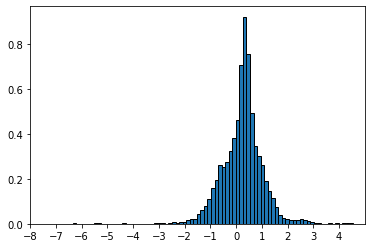

In [29]:
plt.xticks(np.arange(int(min(err)), int(max(err)), 1))
plt.xlim((int(min(err)), int(max(err))))
plt.hist(err, bins=100, edgecolor='black', density=True)
#plt.plot(x1, y1, 'r')
plt.show()

0.23746032 0.82467496


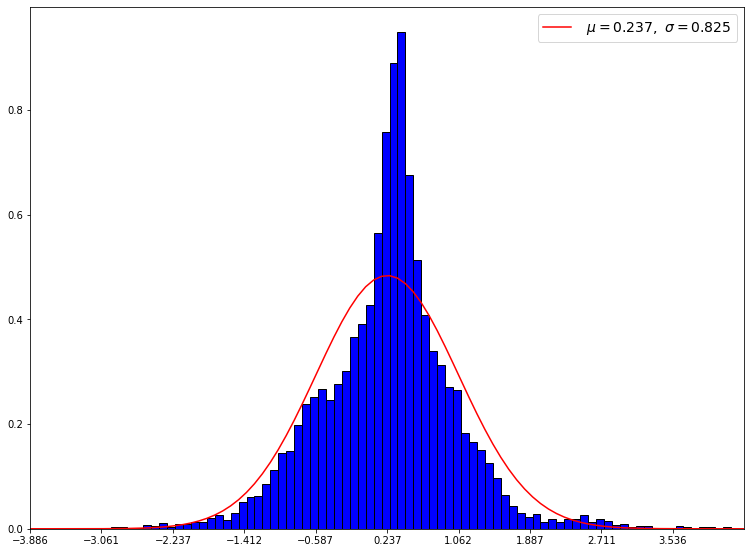

In [30]:
from scipy.stats import norm
plt.figure(figsize=(12.8,9.6))
#plt.xticks(np.arange(-int(max(err)), int(max(err)), std))
#plt.xticks(b)
#plt.xlim(-int(max(err)), int(max(err)))

(muuu, sigmaaa) = norm.fit(err)
nss, binsss, patchesss = plt.hist(np.array(err), 150, density=True, facecolor='b', alpha=1, edgecolor='k')
print(muuu, sigmaaa)
plt.xlim(muuu-5*sigmaaa, muuu+5*sigmaaa)
plt.xticks(np.arange(muuu-5*sigmaaa, muuu+5*sigmaaa, sigmaaa))
yy = norm.pdf( binsss, muuu, sigmaaa)
l = plt.plot(binsss, yy, 'r', label=r'$\mathrm{}\ \mu=%.3f,\ \sigma=%.3f$' %(muuu, sigmaaa))
plt.legend(loc='upper right', prop={'size': 14})

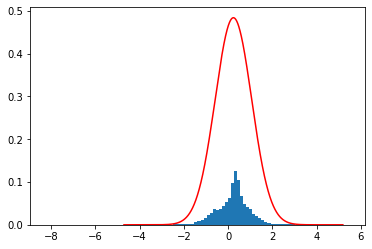

In [31]:

import math
import matplotlib.mlab as mlab
def norm_pdf(x,mu,sigma):
    pdf = np.exp(-((x - mu)**2) / (2* sigma**2)) / (sigma * np.sqrt(2*np.pi)) 
    return pdf
def normal_distribution(x, mean, sigma):
    return np.exp(-1*((x-mean)**2)/(2*(sigma**2)))/(math.sqrt(2*np.pi) * sigma)
mean1, sigma1 = mean, std
x1 = np.linspace(mean1 - 6*sigma1, mean1 + 6*sigma1, np.array(err).shape[0]-1)
#print(x1)
y1 = normal_distribution(x1, mean1, sigma1)
plt.hist(err,bins=100, weights=np.zeros_like(err) + 1. / len(err))
plt.plot(x1, y1, 'r')
plt.show()
